# Visualizations of Formula 1 Data

### Sam Timmins

In [1]:
import fastf1
import fastf1.plotting
import fastf1.utils
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)
fastf1.set_log_level('WARNING')

To get an idea of the general flow of a race and strategy we can first take a look at how the driver's positions change over the coruse of a race. The example below is from the Monaco Grand Prix in 2023. The code for most of the following visualizations can be found [here](https://docs.fastf1.dev/examples_gallery/index.html).

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/stimmins/Library/Caches/fastf1.
	Size: 268.51 MB


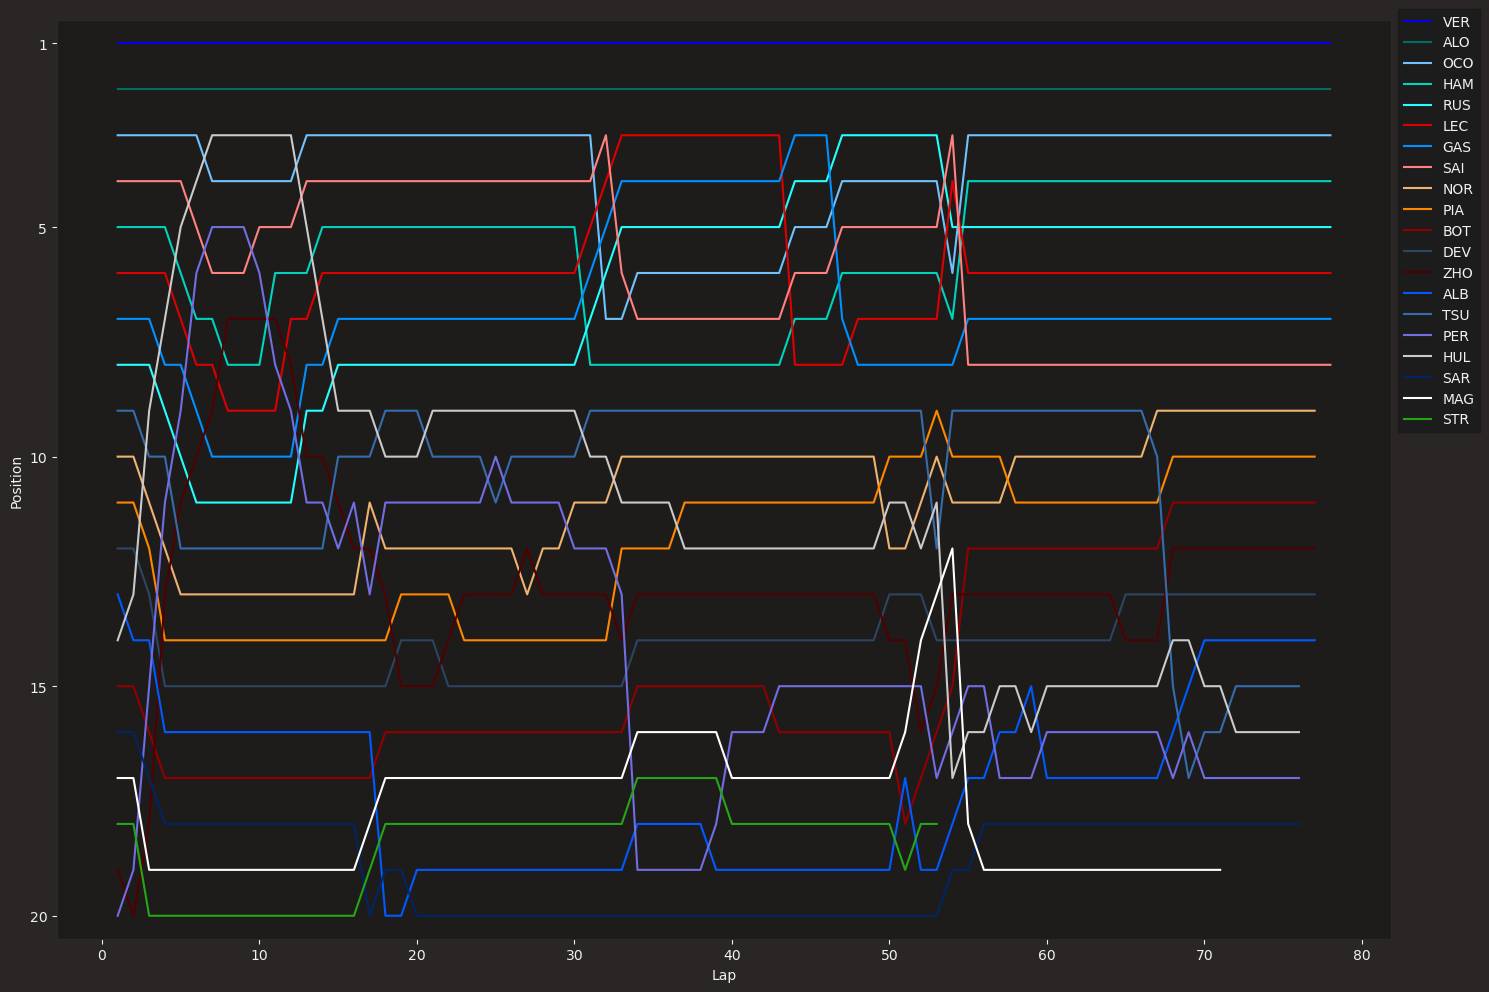

In [2]:
session = fastf1.get_session(2023, 'Monaco', 'R')
session.load(telemetry=False, weather=False)

fig, ax = plt.subplots(figsize=(15.0, 10.0))

for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)
    
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

The above visualization shows some really interesting patterns especially in the top 10 which saw some drivers pit earlier than others in order to try and complete an undercut. We can then see the drivers at risk of being undercut pit within a lap or two to try and cover it off. This also shows how some drivers who go longer before pitting gain an artificially high position and later return to the actual position they should be in when pitting later, this is commonly referred to as track position versus race position.

Formula 1 cars are the fastest cars in the world around a race track, however, because each team develops their own cars from the ground up, there is often a distribution in the performance between teams. This year, Red Bull have a dominant car while the Williams team has arguably the slowest car thus far. We can compare just how much of a difference there is in speeds in the following visualizations from Saudi Arabia Grand Prix which is one of the fastest tracks on the calendar.

In [3]:
session = fastf1.get_session(2023, 'Saudi Arabia', 'Q')
session.load()

In [4]:
per_lap = session.laps.pick_driver('PER').pick_fastest() # Sergio Perez (Red Bull) was on pole for this race meaning he was the fastest driver
sar_lap = session.laps.pick_driver('SAR').pick_fastest() # Logan Sargenat (Williams) qualified last

In [5]:
per_tel = per_lap.get_car_data().add_distance()
sar_tel = sar_lap.get_car_data().add_distance()

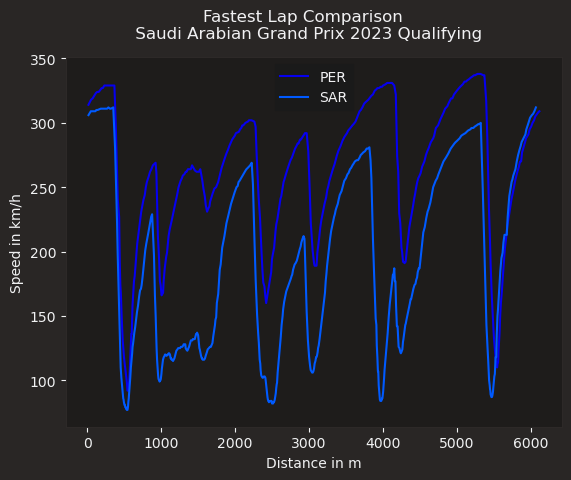

In [6]:
rbr_color = fastf1.plotting.team_color('RBR')
wil_color = fastf1.plotting.team_color('WIL')

fig, ax = plt.subplots()
ax.plot(per_tel['Distance'], per_tel['Speed'], color=rbr_color, label='PER')
ax.plot(sar_tel['Distance'], sar_tel['Speed'], color=wil_color, label='SAR')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

As we can see above, the Red Bull car driven by Perez was signficantly faster at almost every point of the lap. We can also use this type of visualization to see where a teammate might gain an advantage over the other throughout a qualifying lap.

In [7]:
ham_lap = session.laps.pick_driver('HAM').pick_fastest() # Lewis Hamilton (Mercedes)
ham_tel = ham_lap.get_car_data().add_distance()
rus_lap = session.laps.pick_driver('RUS').pick_fastest() # George Russell (Mercedes)
rus_tel = rus_lap.get_car_data().add_distance()

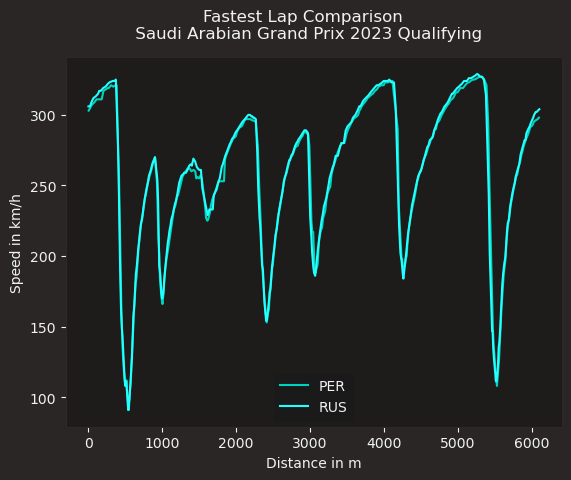

In [8]:
ham_color = fastf1.plotting.driver_color('HAM')
rus_color = fastf1.plotting.driver_color('RUS')

fig, ax = plt.subplots()
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=ham_color, label='PER')
ax.plot(rus_tel['Distance'], rus_tel['Speed'], color=rus_color, label='RUS')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

We can see that the difference between the two Mercedes teammates was very minimal, however, Russell was able to finish the lap by roughly 4 tenths of a second faster than Hamilton showing how competitive and close the racing at this level is.

However, while the car determines a significant amount of performance, so does the tire that the car is currently using. In Formula 1 there are a total of 8 different tire compounds, 5 of which are available on any given race weekend. Two compounds that are available at every race are the Full Wet tires and the Intermediate tires which are used during rain or other types of weather depending on the amount of water that is on the track. The other 3 compounds available are selected from 6 compounds of varying levels of "softness" and are named C0 (hardest), C1, C2, C3, C4, C5 (softest) based on the track surface, layout, and more. These 3 selected tires are then named soft, medium, and hard for that given weekend. A softer tire usually provides the most performance and speed but wears quickly while a harder tire will be slower and provide less grip but last longer and provide more consistent performance for many laps. Below we can see a visualization of how the different tires affect lap times for the top 10 drivers at the Azerbaijan Grand Prix.

In [9]:
fastf1.Cache.clear_cache()

In [10]:
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

_api        WARNING 	Driver 241: Position data is incomplete!
_api        WARNING 	Driver 242: Position data is incomplete!
_api        WARNING 	Driver 243: Position data is incomplete!


In [11]:
point_finishers = race.drivers[:10]
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index(drop=True)

['11', '1', '16', '14', '55', '44', '18', '63', '4', '22']


In [12]:
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

['PER', 'VER', 'LEC', 'ALO', 'SAI', 'HAM', 'STR', 'RUS', 'NOR', 'TSU']


In [13]:
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

{'LEC': '#dc0000', 'SAI': '#ff8181', 'VER': '#0600ef', 'PER': '#716de2', 'PIA': '#ff8700', 'NOR': '#eeb370', 'GAS': '#0090ff', 'OCO': '#70c2ff', 'BOT': '#900000', 'ZHO': '#500000', 'DEV': '#2b4562', 'TSU': '#356cac', 'MAG': '#ffffff', 'HUL': '#cacaca', 'ALO': '#006f62', 'STR': '#25a617', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'ALB': '#005aff', 'SAR': '#012564'}


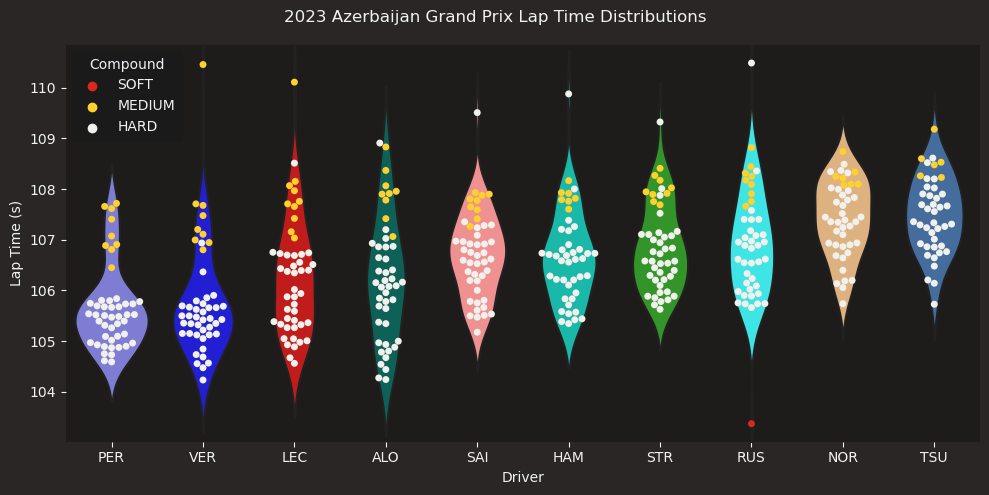

In [14]:
# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               inner=None,
               scale="area",
               order=finishing_order,
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("2023 Azerbaijan Grand Prix Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

As we can see above, most of the faster lap times were actually on the slower, harder tire. This is most likely due to the fuel level of the cars as most drivers will opt to start on a softer tire for the start and then move to a harder tire later in the race as their fuel levels decrease and allow them to go much faster. This is interesting as it potentially shows that fuel level is more important to pace than the tire choice, further supported by the chart below, this will be something to consider later in modeling.

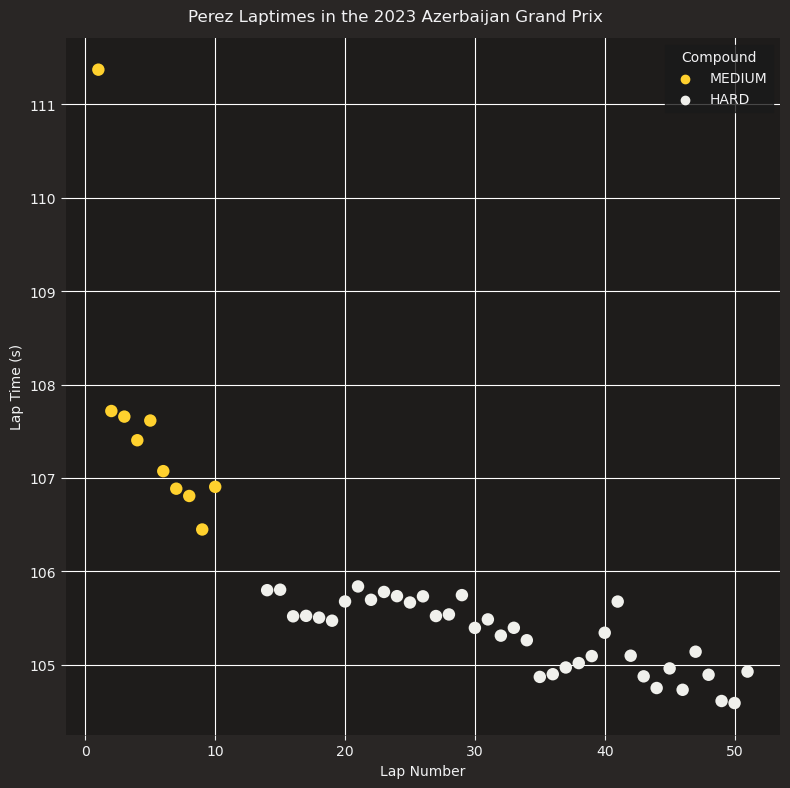

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
driver_laps = race.laps.pick_driver('PER').pick_quicklaps().reset_index()
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime(s)",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time (s)")

plt.suptitle("Perez Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

We can also see the different strategies that drivers take over the course of a race...

In [16]:
laps = race.laps
drivers = race.drivers
drivers = [race.get_driver(driver)["Abbreviation"] for driver in drivers]

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

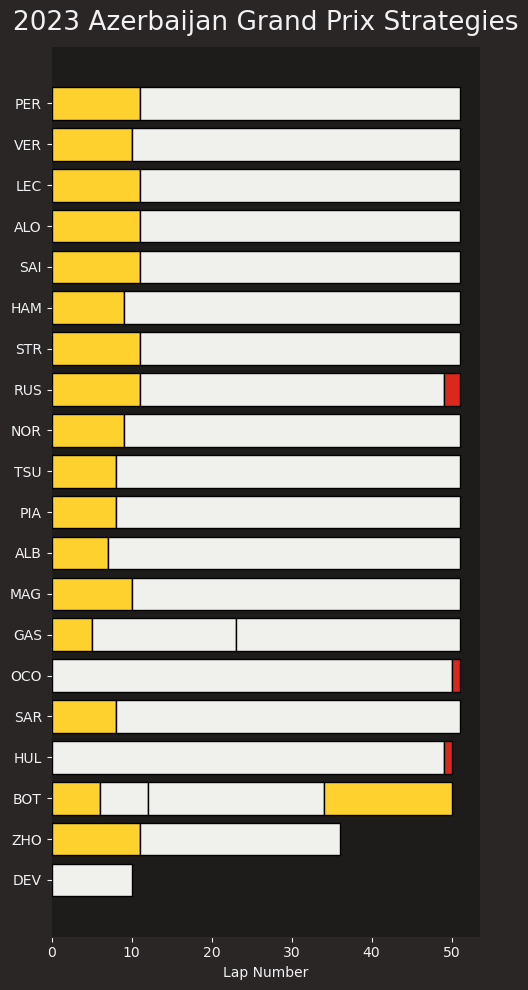

In [17]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]
        
plt.title("2023 Azerbaijan Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

We can also look at race pace of multiple drivers over the course of a race using the code from [here](https://medium.com/p/c053d80f48ff).

In [18]:
laps = race.laps.pick_drivers(['1', '44', '63', '11']) # get top four's laps
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull())] # exclude laps where the drivers pit

/var/folders/74/slb24t3j6197703qqtgwj1cw0000gn/T/ipykernel_13161/1578514655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()


In [19]:
# Also, we remove outliers since those don't represent the racepace,
# using the Inter-Quartile Range (IQR) proximity rule
q75, q25 = laps['LapTimeSeconds'].quantile(0.75), laps['LapTimeSeconds'].quantile(0.25)

intr_qr = q75 - q25

laptime_max = q75 + (1.5 * intr_qr) # IQR proximity rule: Max = q75 + 1,5 * IQR
laptime_min = q25 - (1.5 * intr_qr) # IQR proximity rule: Min = q25 + 1,5 * IQR

laps.loc[laps['LapTimeSeconds'] < laptime_min, 'LapTimeSeconds'] = np.nan
laps.loc[laps['LapTimeSeconds'] > laptime_max, 'LapTimeSeconds'] = np.nan

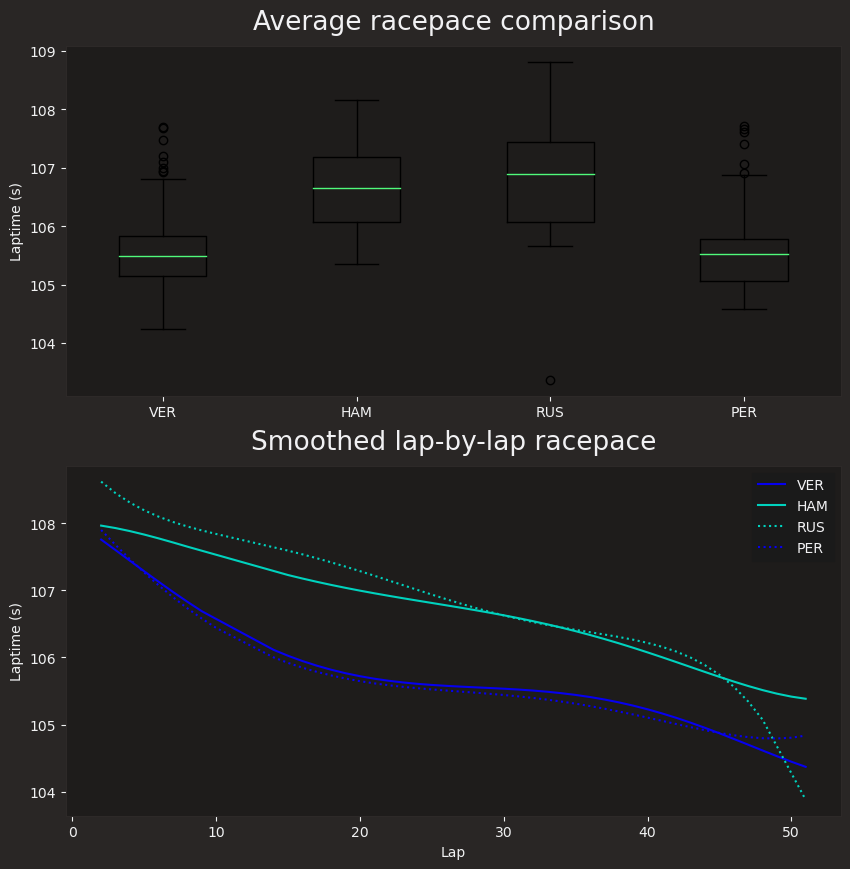

In [20]:
drivers_to_visualize = ['VER', 'HAM', 'RUS', 'PER']
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [10, 10]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(2)

##############################
#
# Boxplot for average racepace
#
##############################
laptimes = [laps.pick_driver(x)['LapTimeSeconds'].dropna() for x in drivers_to_visualize] 

ax[0].boxplot(laptimes, labels=drivers_to_visualize)

ax[0].set_title('Average racepace comparison')
ax[0].set(ylabel = 'Laptime (s)')

##############################
#
# Lap-by-lap racepace comparison
#
##############################
for driver in drivers_to_visualize:
    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax[1].plot(x, y_poly, label=driver, color=fastf1.plotting.team_color(team), linestyle=linestyle)
    
    # Include scatterplot (individual laptimes)
    # y = driver_laps['LapTimeSeconds']
    # scatter_marker = 'o' if team not in visualized_teams else '^' 
    # ax[1].scatter(x, y, label=driver, color=fastf1.plotting.team_color(team), marker=scatter_marker)
    
    # Append labels
    ax[1].set(ylabel = 'Laptime (s)')
    ax[1].set(xlabel = 'Lap')
    
    # Set title
    ax[1].set_title('Smoothed lap-by-lap racepace')

    # Generate legend
    ax[1].legend()
    
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)

The significant drop in lap time for Russell at the end of the race is almost certainly caused by his switch to softs at the end of the race as shown in the strategies visualization above.

The FastF1 API also provides access to telemetry data so we can see not only where some drivers make up time to others through a lap by comparing their speed like we did above, but also, **WHY** they are able to make up this speed by comparing their inputs. Below is an example of this using the same drivers as above, Sergio Perez and Logan Sargeant as well as Lewis Hamilton and George Russell.

In [21]:
delta_time, ref_tel, compare_tel = fastf1.utils.delta_time(per_lap, sar_lap)

/Users/stimmins/miniconda3/envs/mlenv/lib/python3.9/site-packages/fastf1/utils.py:81: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


In [22]:
plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {'PER'} VS {'SAR'}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]

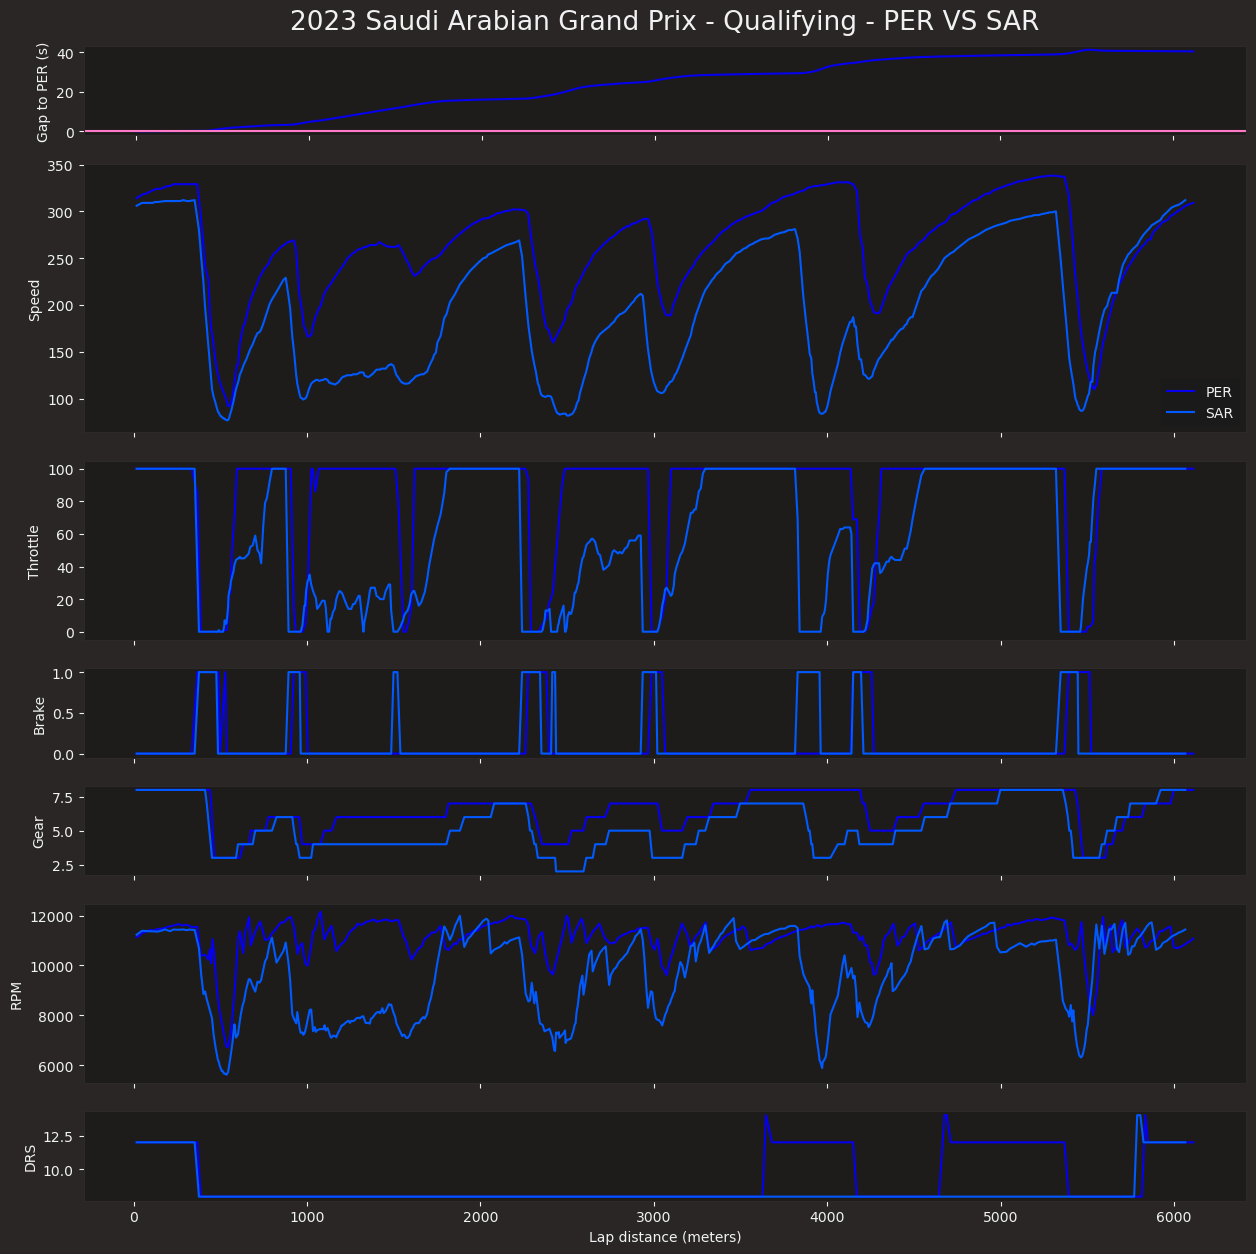

In [23]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].title.set_text(plot_title)

# Delta line
ax[0].plot(ref_tel['Distance'], delta_time, color=rbr_color)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {'PER'} (s)")

# Speed trace
ax[1].plot(per_tel['Distance'], per_tel['Speed'], label='PER', color=rbr_color)
ax[1].plot(sar_tel['Distance'], sar_tel['Speed'], label='SAR', color=wil_color)
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(per_tel['Distance'], per_tel['Throttle'], label='PER', color=rbr_color)
ax[2].plot(sar_tel['Distance'], sar_tel['Throttle'], label='SAR', color=wil_color)
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(per_tel['Distance'], per_tel['Brake'], label='PER', color=rbr_color)
ax[3].plot(sar_tel['Distance'], sar_tel['Brake'], label='SAR', color=wil_color)
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(per_tel['Distance'], per_tel['nGear'], label='PER', color=rbr_color)
ax[4].plot(sar_tel['Distance'], sar_tel['nGear'], label='SAR', color=wil_color)
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(per_tel['Distance'], per_tel['RPM'], label='PER', color=rbr_color)
ax[5].plot(sar_tel['Distance'], sar_tel['RPM'], label='SAR', color=wil_color)
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(per_tel['Distance'], per_tel['DRS'], label='PER', color=rbr_color)
ax[6].plot(sar_tel['Distance'], sar_tel['DRS'], label='SAR', color=wil_color)
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

In [24]:
delta_time, ref_tel, compare_tel = fastf1.utils.delta_time(ham_lap, rus_lap)

/Users/stimmins/miniconda3/envs/mlenv/lib/python3.9/site-packages/fastf1/utils.py:81: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


In [25]:
plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {'HAM'} VS {'RUS'}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]

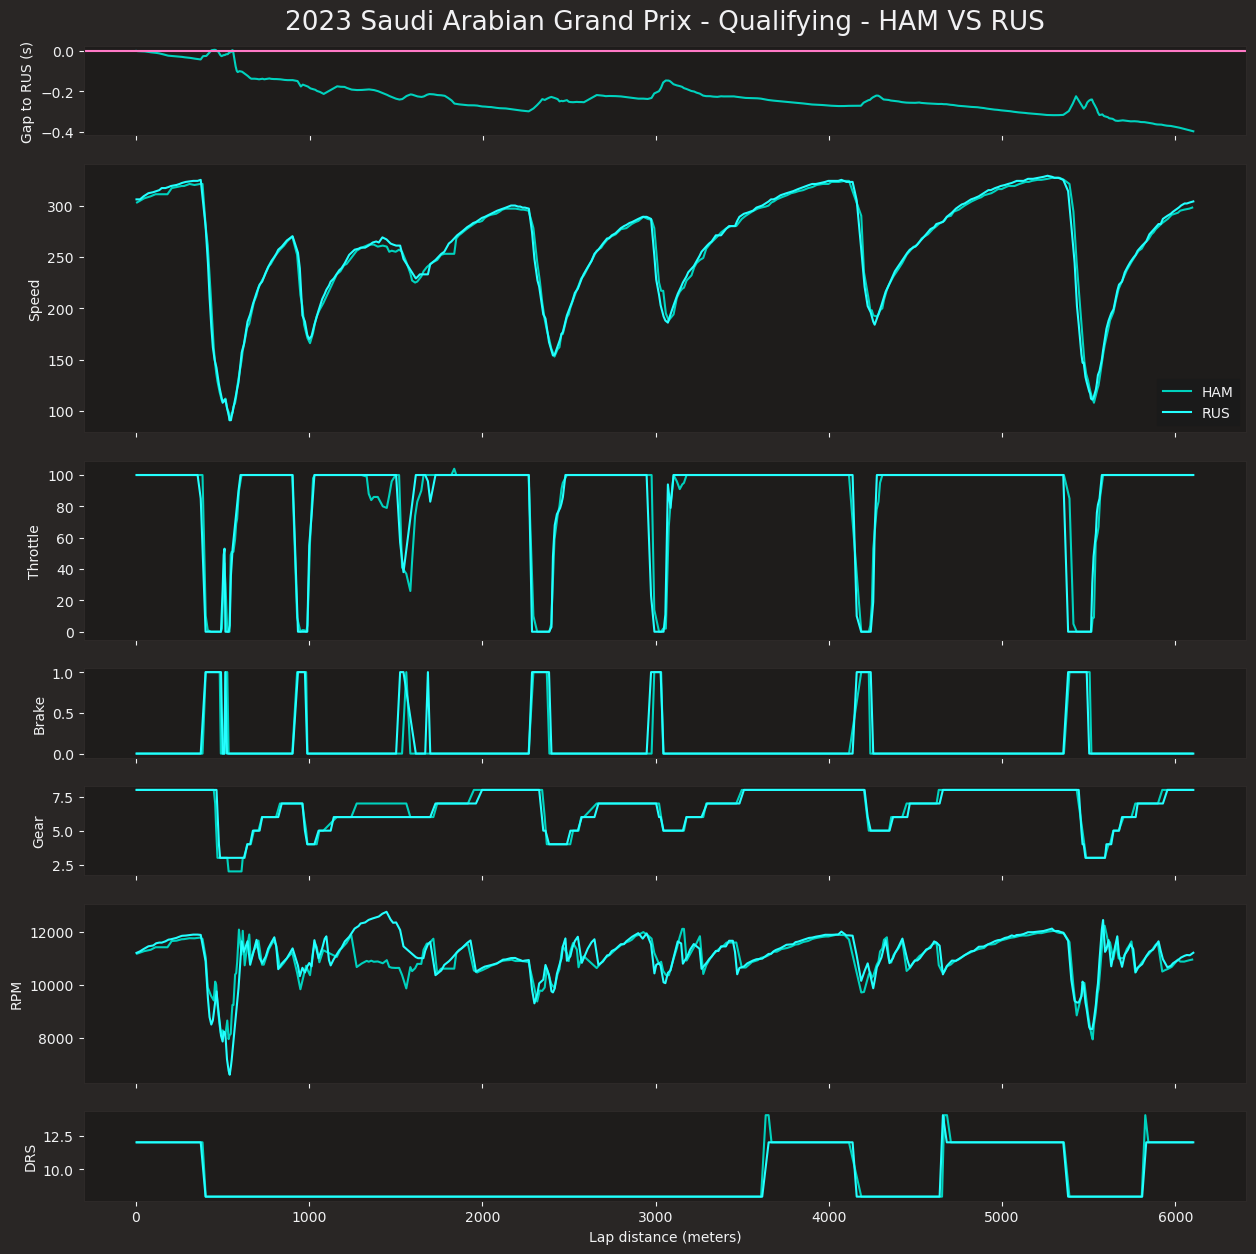

In [26]:
# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].title.set_text(plot_title)

# Delta line
ax[0].plot(ref_tel['Distance'], delta_time, color=ham_color)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {'RUS'} (s)")

# Speed trace
ax[1].plot(ham_tel['Distance'], ham_tel['Speed'], label='HAM', color=ham_color)
ax[1].plot(rus_tel['Distance'], rus_tel['Speed'], label='RUS', color=rus_color)
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(ham_tel['Distance'], ham_tel['Throttle'], label='HAM', color=ham_color)
ax[2].plot(rus_tel['Distance'], rus_tel['Throttle'], label='RUS', color=rus_color)
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(ham_tel['Distance'], ham_tel['Brake'], label='HAM', color=ham_color)
ax[3].plot(rus_tel['Distance'], rus_tel['Brake'], label='RUS', color=rus_color)
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(ham_tel['Distance'], ham_tel['nGear'], label='HAM', color=ham_color)
ax[4].plot(rus_tel['Distance'], rus_tel['nGear'], label='RUS', color=rus_color)
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(ham_tel['Distance'], ham_tel['RPM'], label='HAM', color=ham_color)
ax[5].plot(rus_tel['Distance'], rus_tel['RPM'], label='RUS', color=rus_color)
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(ham_tel['Distance'], ham_tel['DRS'], label='HAM', color=ham_color)
ax[6].plot(rus_tel['Distance'], rus_tel['DRS'], label='RUS', color=rus_color)
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

Looking at the telemetry above between Perez and Sargeant we can see how the extra performance of the Red Bull allows Perez to both brake later entering a turn, carry more speed through the turn, and get on the throttle earlier in a turn than Sargeant can in the Williams car. This is the crucial aspect that allows the laptimes of the Red Bull to be so much lower than the laptimes of the Williams. We can also see from the comparison of Hamilton and Russell, who are teammates, just how close the drivers are in skill level as the telemetry data is almost identical but Russell is able to pull a slight gap to Hamilton during the qualifying sessions by the finest of margins in the telemtry.

In [27]:
def lookup (df, team, points):
    df['lookup1'] = df.season.astype(str) + df[team] + df['round'].astype(str)
    df['lookup2'] = df.season.astype(str) + df[team] + (df['round']-1).astype(str)
    new_df = df.merge(df[['lookup1', points]], how = 'left', left_on='lookup2',right_on='lookup1')
    new_df.drop(['lookup1_x', 'lookup2', 'lookup1_y'], axis = 1, inplace = True)
    new_df.rename(columns = {points+'_x': points+'_after_race', points+'_y': points}, inplace = True)
    new_df[points].fillna(0, inplace = True)
    return new_df

In [28]:
import requests

races = {'season': [],
        'round': [],
        'circuit_id': [],
        'lat': [],
        'long': [],
        'country': [],
        'date': [],
        'url': []}

for year in list(range(2023, 2024)):
    
    url = 'https://ergast.com/api/f1/{}.json'
    r = requests.get(url.format(year))
    json = r.json()

    for item in json['MRData']['RaceTable']['Races']:
        try:
            races['season'].append(int(item['season']))
        except:
            races['season'].append(None)

        try:
            races['round'].append(int(item['round']))
        except:
            races['round'].append(None)

        try:
            races['circuit_id'].append(item['Circuit']['circuitId'])
        except:
            races['circuit_id'].append(None)

        try:
            races['lat'].append(float(item['Circuit']['Location']['lat']))
        except:
            races['lat'].append(None)

        try:
            races['long'].append(float(item['Circuit']['Location']['long']))
        except:
            races['long'].append(None)

        try:
            races['country'].append(item['Circuit']['Location']['country'])
        except:
            races['country'].append(None)

        try:
            races['date'].append(item['date'])
        except:
            races['date'].append(None)

        try:
            races['url'].append(item['url'])
        except:
            races['url'].append(None)
        
races = pd.DataFrame(races)
print(races.shape)

(22, 8)


In [29]:
races.drop(races.tail(15).index,inplace=True)

In [30]:
rounds = []
for year in np.array(races.season.unique()):
    rounds.append([year, list(races[races.season == year]['round'])])

In [31]:
# append the number of rounds to each season from the races_df
rounds = []
for year in np.array(races.season.unique()):
    rounds.append([year, list(races[races.season == year]['round'])])

# query API
    
results = {'season': [],
          'round':[],
           'circuit_id':[],
          'driver': [],
           'date_of_birth': [],
           'nationality': [],
          'constructor': [],
          'grid': [],
          'time': [],
          'status': [],
          'points': [],
          'podium': []}

for n in list(range(len(rounds))):
    for i in rounds[n][1]:
    
        url = 'http://ergast.com/api/f1/{}/{}/results.json'
        r = requests.get(url.format(rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['RaceTable']['Races'][0]['Results']:
            try:
                results['season'].append(int(json['MRData']['RaceTable']['Races'][0]['season']))
            except:
                results['season'].append(None)

            try:
                results['round'].append(int(json['MRData']['RaceTable']['Races'][0]['round']))
            except:
                results['round'].append(None)

            try:
                results['circuit_id'].append(json['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            except:
                results['circuit_id'].append(None)

            try:
                results['driver'].append(item['Driver']['driverId'])
            except:
                results['driver'].append(None)
            
            try:
                results['date_of_birth'].append(item['Driver']['dateOfBirth'])
            except:
                results['date_of_birth'].append(None)
                
            try:
                results['nationality'].append(item['Driver']['nationality'])
            except:
                results['nationality'].append(None)

            try:
                results['constructor'].append(item['Constructor']['constructorId'])
            except:
                results['constructor'].append(None)

            try:
                results['grid'].append(int(item['grid']))
            except:
                results['grid'].append(None)

            try:
                results['time'].append(int(item['Time']['millis']))
            except:
                results['time'].append(None)

            try:
                results['status'].append(item['status'])
            except:
                results['status'].append(None)

            try:
                results['points'].append(int(item['points']))
            except:
                results['points'].append(None)

            try:
                results['podium'].append(int(item['position']))
            except:
                results['podium'].append(None)

           
results = pd.DataFrame(results)

In [32]:
results.head()

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
0,2023,1,bahrain,max_verstappen,1997-09-30,Dutch,red_bull,1,5636736.0,Finished,25,1
1,2023,1,bahrain,perez,1990-01-26,Mexican,red_bull,2,5648723.0,Finished,18,2
2,2023,1,bahrain,alonso,1981-07-29,Spanish,aston_martin,5,5675373.0,Finished,15,3
3,2023,1,bahrain,sainz,1994-09-01,Spanish,ferrari,4,5684788.0,Finished,12,4
4,2023,1,bahrain,hamilton,1985-01-07,British,mercedes,7,5687713.0,Finished,10,5


In [33]:
number_of_rounds = 0
for season in rounds:
    number_of_rounds = number_of_rounds + len(season[1])
finished_statuses = ['Finished', '+1 Lap', '+2 Laps', '+6 Laps']
unfinished_races = results[~results['status'].isin(finished_statuses)]
unfinished_races_count = unfinished_races.groupby('constructor')[['status']].count()
unfinished_races_count = unfinished_races_count.sort_values(by='status', ascending=False)

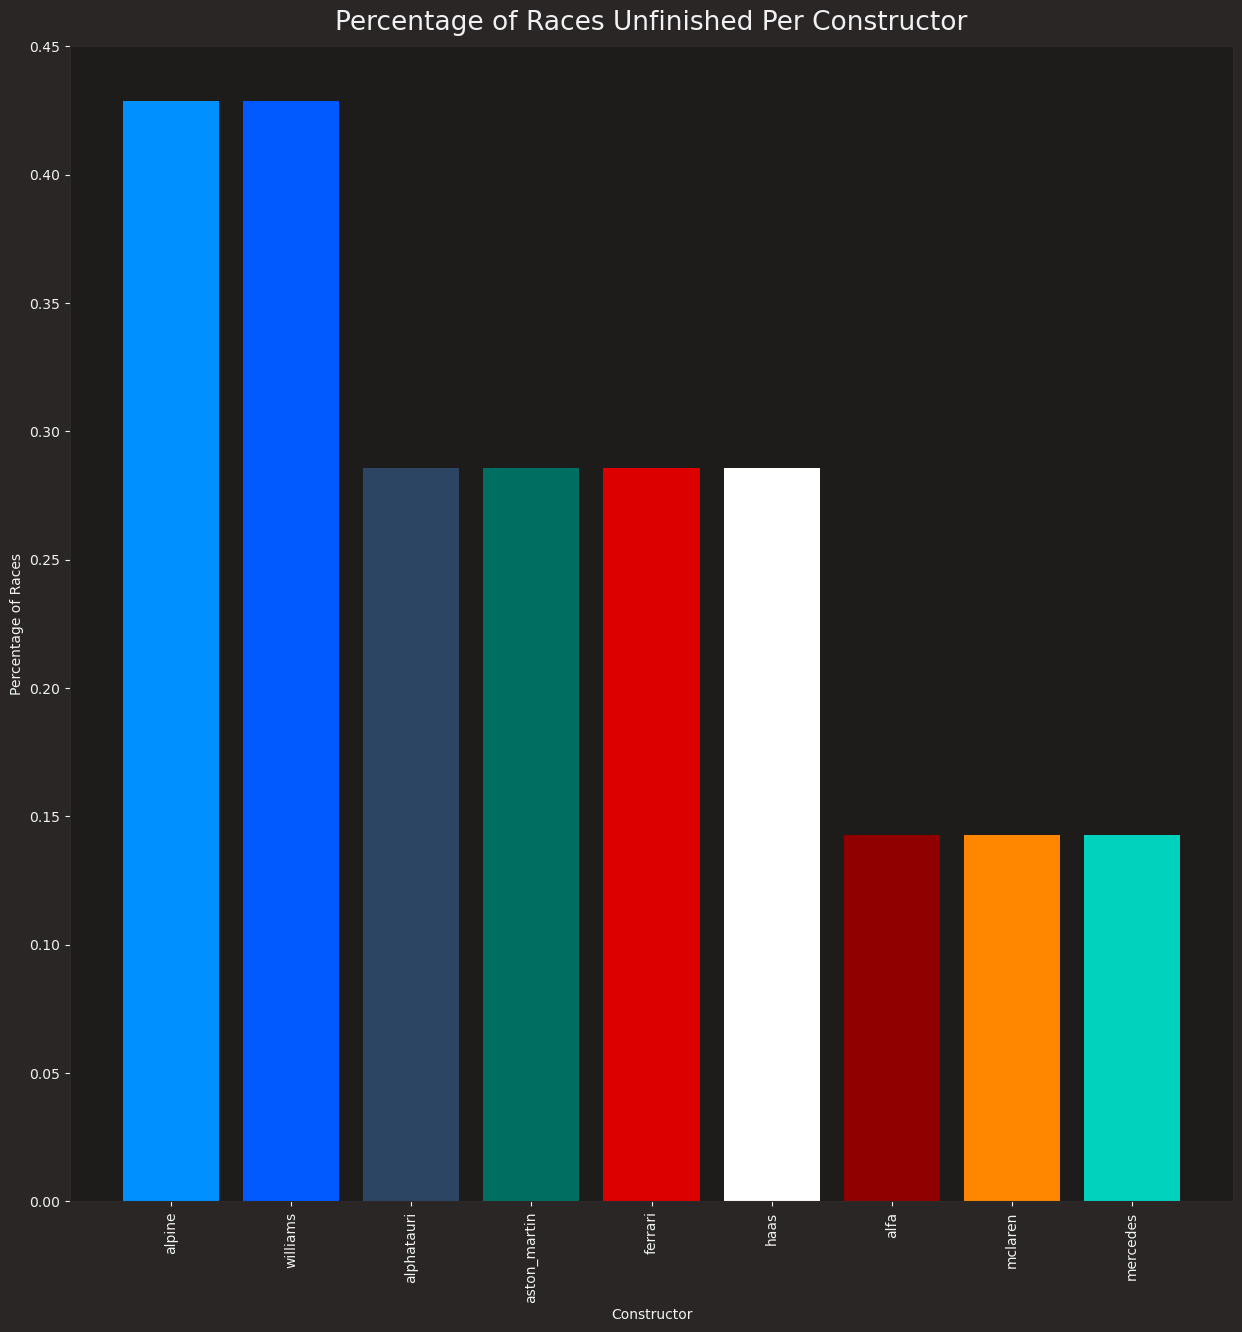

In [34]:
colors = [fastf1.plotting.team_color(team) for team in unfinished_races_count.index]
plt.bar(unfinished_races_count.index, unfinished_races_count['status'] / number_of_rounds, color=colors)

# Customize the graph
plt.xlabel('Constructor')
plt.ylabel('Percentage of Races')
plt.title('Percentage of Races Unfinished Per Constructor')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the graph
plt.show()

Looking above we can see that some teams are much more reliable than other teams. While this is calculating the number of times a team's car DNFs which could be caused by a range of things it is a good metric to begin to understand how reliable a team's car is. However, we can see that the slower teams tend to have the worst reliability and while a lot of this may be due to actual mechanical reliability issues, another common source of DNFs might be the fact that many of the drivers are crashing out early in the race as they start in the middle or back of the grid and are most likely to end up in a collision at the beginning of the race.

In [35]:
finished_statuses = ['Finished', '+1 Lap', '+2 Laps', '+6 Laps']
unfinished_races = results[~results['status'].isin(finished_statuses)]
unfinished_races_count = unfinished_races.groupby('driver')[['status']].count()
curr_season = results[results['season'] == 2023]
names = curr_season['driver'].unique().tolist()
filtered_races = results[results['driver'].isin(names)]
race_counts = filtered_races['driver'].value_counts()
unfinished_races_count = unfinished_races_count[unfinished_races_count.index.isin(names)]
unfinished_races_count['percent_finished'] = unfinished_races_count['status'] / race_counts
unfinished_races_count = unfinished_races_count.sort_values(by='percent_finished', ascending=False)
names = unfinished_races_count.index.tolist()

In [36]:
unfinished_races_count

,status,percent_finished
driver,,
albon,2,0.285714
de_vries,2,0.285714
kevin_magnussen,2,0.285714
leclerc,2,0.285714
ocon,2,0.285714
stroll,2,0.285714
gasly,1,0.142857
piastri,1,0.142857
russell,1,0.142857


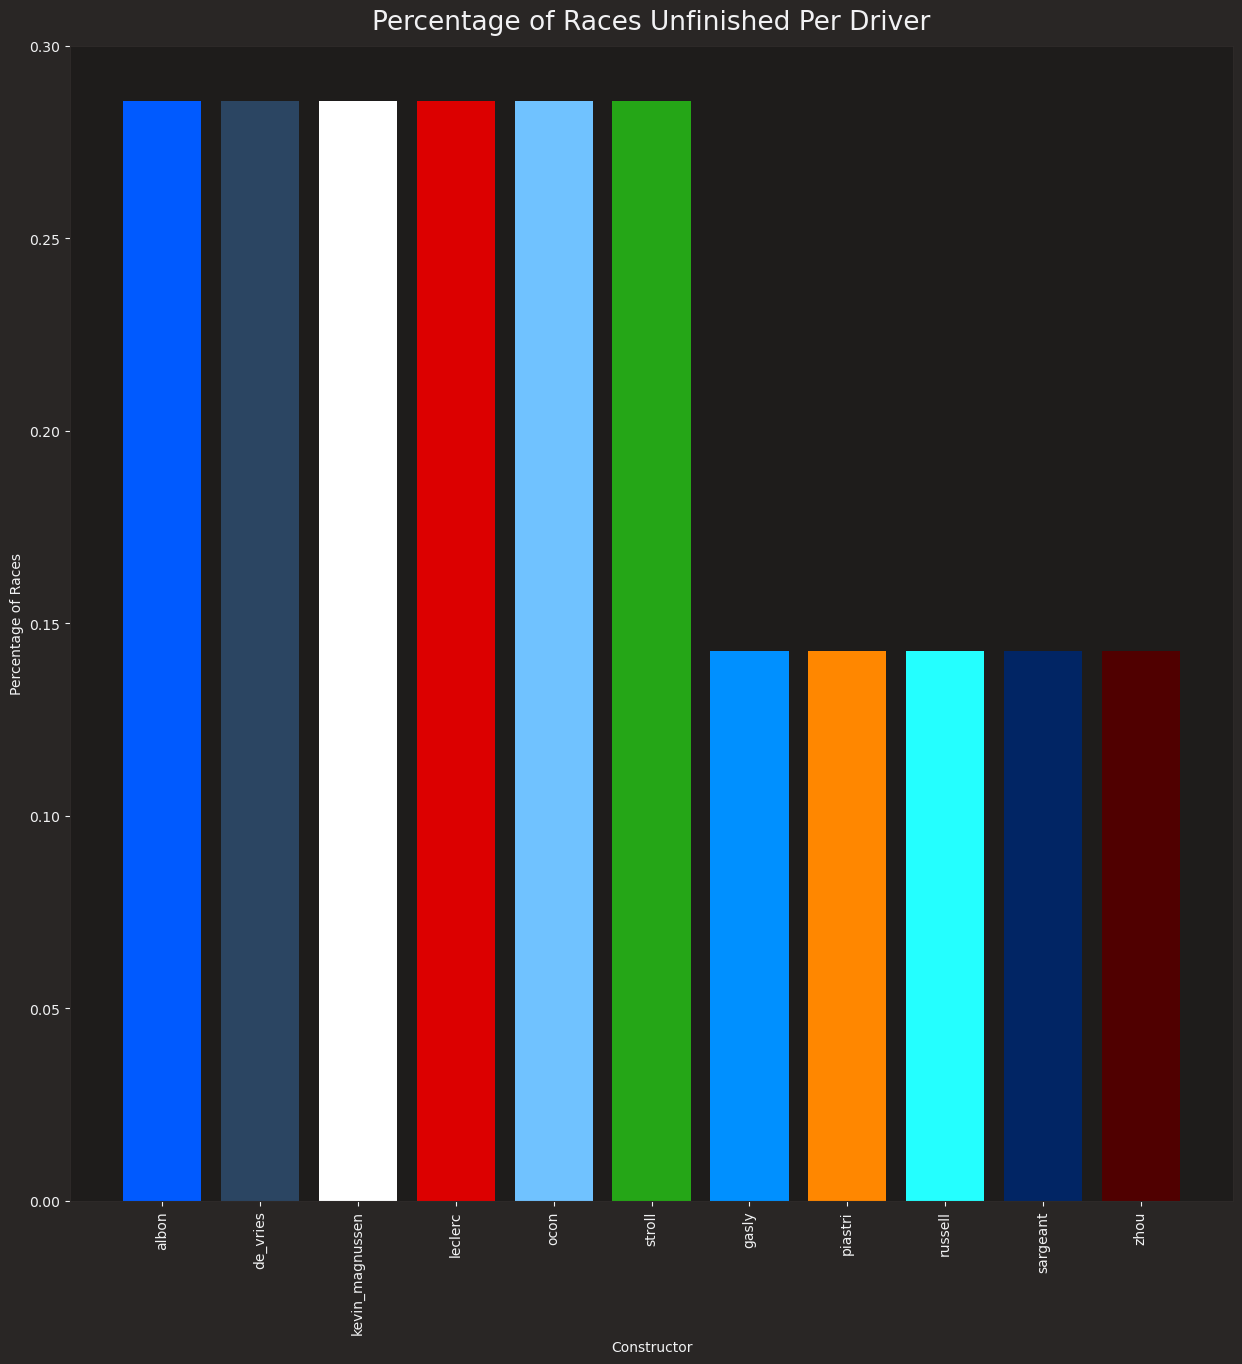

In [37]:
colors = [fastf1.plotting.driver_color(driver) for driver in names]
plt.bar(unfinished_races_count.index, unfinished_races_count['percent_finished'], color=colors)

# Customize the graph
plt.xlabel('Constructor')
plt.ylabel('Percentage of Races')
plt.title('Percentage of Races Unfinished Per Driver')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the graph
plt.show()

Looking above we can see the percentage of retirements for each driver over the 2022 and 2023 seasons. We can see that the car reliability trends follow the drivers pretty closely with the exceptions of the rookies de_vries, sargeant, and piastri who have only officially entered into seven races.

In [38]:
finished_statuses = ['Collision', 'Collision Damage', 'Accident']
unfinished_races = results[results['status'].isin(finished_statuses)]
unfinished_races_count = unfinished_races.groupby('driver')[['status']].count()
curr_season = results[results['season'] == 2023]
names = curr_season['driver'].unique().tolist()
filtered_races = results[results['driver'].isin(names)]
race_counts = filtered_races['driver'].value_counts()
unfinished_races_count = unfinished_races_count[unfinished_races_count.index.isin(names)]
new_index = set(unfinished_races_count.index.tolist()).union(names)
unfinished_races_count = unfinished_races_count.reindex(new_index).fillna(0)
unfinished_races_count['percent_finished'] = unfinished_races_count['status'] / race_counts
unfinished_races_count = unfinished_races_count.sort_values(by='percent_finished', ascending=False)
names = unfinished_races_count.index.tolist()

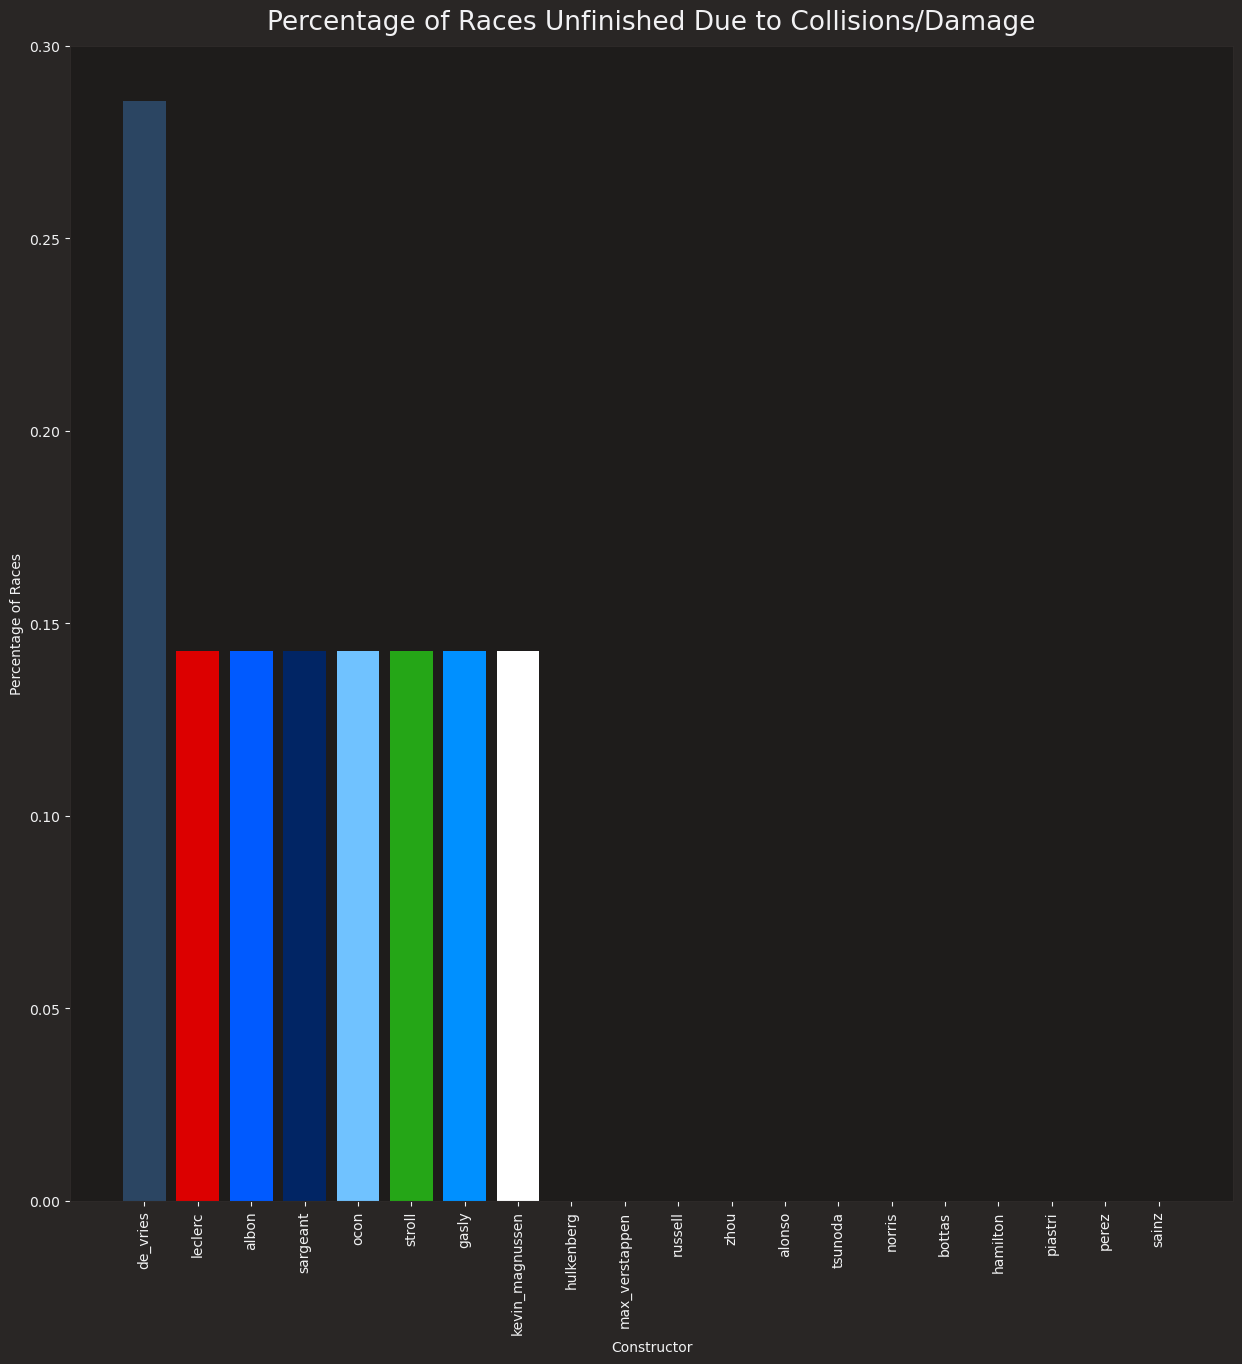

In [39]:
colors = [fastf1.plotting.driver_color(driver) for driver in names]
plt.bar(unfinished_races_count.index, unfinished_races_count['percent_finished'], color=colors)

# Customize the graph
plt.xlabel('Constructor')
plt.ylabel('Percentage of Races')
plt.title('Percentage of Races Unfinished Due to Collisions/Damage')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the graph
plt.show()

Above is a graph of the percentage of races entered by each driver from the 2022 and 2023 season in which they retired due to a collission or accident. Factoring out mechanical failures, we can also see which drivers are most likely to crash above which is also important to factor in and understand because a driver who is more likely to crash is less likely to finish a race and therefore less likely to score points or win.

Finally, we can look at the driver's standings for last year and see which drivers score the highest.

In [40]:
from fastf1.ergast import Ergast

ergast = Ergast()
races = ergast.get_race_schedule(2022)  # Races in year 2022
results = []

# For each race in the season
for rnd, race in races['raceName'].items():

    # Get results. Note that we use the round no. + 1, because the round no.
    # starts from one (1) instead of zero (0)
    temp = ergast.get_race_results(season=2022, round=rnd + 1)
    temp = temp.content[0]

    # If there is a sprint, get the results as well
    sprint = ergast.get_sprint_results(season=2022, round=rnd + 1)
    if sprint.content and sprint.description['round'][0] == rnd + 1:
        temp = pd.merge(temp, sprint.content[0], on='driverCode', how='left')
        # Add sprint points and race points to get the total
        temp['points'] = temp['points_x'] + temp['points_y']
        temp.drop(columns=['points_x', 'points_y'], inplace=True)

    # Add round no. and grand prix name
    temp['round'] = rnd + 1
    temp['race'] = race.removesuffix(' Grand Prix')
    temp = temp[['round', 'race', 'driverCode', 'points']]  # Keep useful cols.
    results.append(temp)

# Append all races into a single dataframe
results = pd.concat(results)
races = results['race'].drop_duplicates()

In [41]:
results = results.pivot(index='driverCode', columns='round', values='points')
# Here we have a 22-by-22 matrix (22 races and 22 drivers, incl. DEV and HUL)

# Rank the drivers by their total points
results['total_points'] = results.sum(axis=1)
results = results.sort_values(by='total_points', ascending=False)
results.drop(columns='total_points', inplace=True)

# Use race name, instead of round no., as column names
results.columns = races

In [42]:
import plotly.express as px
from plotly.io import show

fig = px.imshow(
    results,
    text_auto=True,
    aspect='auto',  # Automatically adjust the aspect ratio
    color_continuous_scale=[[0,    'rgb(198, 219, 239)'],  # Blue scale
                            [0.25, 'rgb(107, 174, 214)'],
                            [0.5,  'rgb(33,  113, 181)'],
                            [0.75, 'rgb(8,   81,  156)'],
                            [1,    'rgb(8,   48,  107)']],
    labels={'x': 'Race',
            'y': 'Driver',
            'color': 'Points'}       # Change hover texts
)
fig.update_xaxes(title_text='')      # Remove axis titles
fig.update_yaxes(title_text='')
fig.update_yaxes(tickmode='linear')  # Show all ticks, i.e. driver names
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey',
                 showline=False,
                 tickson='boundaries')              # Show horizontal grid only
fig.update_xaxes(showgrid=False, showline=False)    # And remove vertical grid
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')     # White background
fig.update_layout(coloraxis_showscale=False)        # Remove legend
fig.update_layout(xaxis=dict(side='top'))           # x-axis on top
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))  # Remove border margins
fig
show(fig)

And for the 2023 season thus far...

In [43]:
races = ergast.get_race_schedule(2023)  # Races in year 2022
results = []

# For each race in the season
for rnd, race in races['raceName'].items():
    if rnd + 1 <= 7:
        # Get results. Note that we use the round no. + 1, because the round no.
        # starts from one (1) instead of zero (0)
        temp = ergast.get_race_results(season=2023, round=rnd + 1)
        temp = temp.content[0]

        # If there is a sprint, get the results as well
        sprint = ergast.get_sprint_results(season=2023, round=rnd + 1)
        if sprint.content and sprint.description['round'][0] == rnd + 1:
            temp = pd.merge(temp, sprint.content[0], on='driverCode', how='left')
            # Add sprint points and race points to get the total
            temp['points'] = temp['points_x'] + temp['points_y']
            temp.drop(columns=['points_x', 'points_y'], inplace=True)

        # Add round no. and grand prix name
        temp['round'] = rnd + 1
        temp['race'] = race.removesuffix(' Grand Prix')
        temp = temp[['round', 'race', 'driverCode', 'points']]  # Keep useful cols.
        results.append(temp)

# Append all races into a single dataframe
results = pd.concat(results)
races = results['race'].drop_duplicates()

In [44]:
results = results.pivot(index='driverCode', columns='round', values='points')
# Here we have a 22-by-22 matrix (22 races and 22 drivers, incl. DEV and HUL)

# Rank the drivers by their total points
results['total_points'] = results.sum(axis=1)
results = results.sort_values(by='total_points', ascending=False)
results.drop(columns='total_points', inplace=True)

# Use race name, instead of round no., as column names
results.columns = races

In [45]:
import plotly.express as px
from plotly.io import show

fig = px.imshow(
    results,
    text_auto=True,
    aspect='auto',  # Automatically adjust the aspect ratio
    color_continuous_scale=[[0,    'rgb(198, 219, 239)'],  # Blue scale
                            [0.25, 'rgb(107, 174, 214)'],
                            [0.5,  'rgb(33,  113, 181)'],
                            [0.75, 'rgb(8,   81,  156)'],
                            [1,    'rgb(8,   48,  107)']],
    labels={'x': 'Race',
            'y': 'Driver',
            'color': 'Points'}       # Change hover texts
)
fig.update_xaxes(title_text='')      # Remove axis titles
fig.update_yaxes(title_text='')
fig.update_yaxes(tickmode='linear')  # Show all ticks, i.e. driver names
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey',
                 showline=False,
                 tickson='boundaries')              # Show horizontal grid only
fig.update_xaxes(showgrid=False, showline=False)    # And remove vertical grid
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')     # White background
fig.update_layout(coloraxis_showscale=False)        # Remove legend
fig.update_layout(xaxis=dict(side='top'))           # x-axis on top
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))  # Remove border margins
fig
show(fig)

As we can see above, Max Verstappen is currently running away with the championship having finished in the top two in every race thus far and having won 5 of the 7 races.

In [48]:
race = fastf1.get_session(2023, 'Spain', 'Q')
race.load()
race.laps.pick_driver('PER').pick_quicklaps().columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [52]:
race.laps.pick_driver('PER')[['Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime']]

,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime
208,NaT,0 days 00:00:33.723000,0 days 00:00:30.143000,NaT,0 days 00:17:16.856000,0 days 00:17:47.011000
209,0 days 00:00:22.225000,0 days 00:00:29.948000,NaT,0 days 00:18:09.214000,0 days 00:18:39.151000,NaT
210,NaT,0 days 00:00:33.278000,0 days 00:00:28.543000,NaT,0 days 00:28:19.766000,0 days 00:28:48.765000
211,0 days 00:00:22.070000,0 days 00:00:30.089000,0 days 00:00:23.675000,0 days 00:29:10.362000,0 days 00:29:40.451000,0 days 00:30:04.126000
212,0 days 00:00:33.332000,0 days 00:00:56.879000,0 days 00:00:36.483000,0 days 00:30:37.458000,0 days 00:31:34.337000,0 days 00:32:10.820000
213,0 days 00:00:22.043000,0 days 00:00:30.092000,0 days 00:00:22.987000,0 days 00:32:32.863000,0 days 00:33:02.955000,0 days 00:33:25.942000
214,0 days 00:00:30.989000,0 days 00:00:44.844000,0 days 00:00:36.702000,0 days 00:33:56.931000,0 days 00:34:41.775000,0 days 00:35:18.477000
215,NaT,0 days 00:00:34.125000,0 days 00:00:25.349000,NaT,0 days 00:38:15.036000,0 days 00:38:40.536000
216,0 days 00:00:21.896000,0 days 00:00:29.578000,0 days 00:00:22.400000,0 days 00:39:02.281000,0 days 00:39:31.859000,0 days 00:39:54.259000
217,0 days 00:00:30.235000,0 days 00:00:41.178000,0 days 00:00:32.908000,0 days 00:40:24.494000,0 days 00:41:05.672000,0 days 00:41:38.580000


In [53]:
race.laps.pick_driver('PER').pick_fastest().get_car_data()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2023-06-03 14:48:42.154,10640,298,8,100,False,12,car,0 days 00:00:00.009000,0 days 01:03:42.145000
1,2023-06-03 14:48:42.394,10680,299,8,100,False,12,car,0 days 00:00:00.249000,0 days 01:03:42.385000
2,2023-06-03 14:48:42.754,10834,305,8,100,False,12,car,0 days 00:00:00.609000,0 days 01:03:42.745000
3,2023-06-03 14:48:43.234,10965,310,8,100,False,12,car,0 days 00:00:01.089000,0 days 01:03:43.225000
4,2023-06-03 14:48:43.594,11046,312,8,100,False,12,car,0 days 00:00:01.449000,0 days 01:03:43.585000
...,...,...,...,...,...,...,...,...,...,...
271,2023-06-03 14:49:54.394,11513,289,7,100,False,12,car,0 days 00:01:12.249000,0 days 01:04:54.385000
272,2023-06-03 14:49:54.554,11490,292,7,100,False,12,car,0 days 00:01:12.409000,0 days 01:04:54.545000
273,2023-06-03 14:49:54.954,10427,295,8,100,False,12,car,0 days 00:01:12.809000,0 days 01:04:54.945000
274,2023-06-03 14:49:55.194,10684,297,8,100,False,12,car,0 days 00:01:13.049000,0 days 01:04:55.185000


In [54]:
race.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:57.558000,VER,1,NaT,1.0,1.0,0 days 00:16:05.138000,NaT,NaT,0 days 00:00:35.382000,...,True,Red Bull Racing,0 days 00:16:05.138000,2023-06-03 14:01:05.147,2,NaN,False,,False,False
1,0 days 00:27:25.360000,VER,1,NaT,2.0,1.0,NaT,0 days 00:19:26.025000,0 days 00:00:21.917000,NaT,...,True,Red Bull Racing,0 days 00:17:57.558000,2023-06-03 14:02:57.567,25,NaN,False,,False,False
2,0 days 00:29:01.273000,VER,1,NaT,3.0,2.0,0 days 00:27:25.360000,NaT,NaT,0 days 00:00:37.454000,...,False,Red Bull Racing,0 days 00:27:25.360000,2023-06-03 14:12:25.369,1,NaN,False,,False,False
3,0 days 00:30:14.933000,VER,1,0 days 00:01:13.660000,4.0,2.0,NaT,NaT,0 days 00:00:21.833000,0 days 00:00:29.620000,...,False,Red Bull Racing,0 days 00:29:01.273000,2023-06-03 14:14:01.282,1,NaN,False,,False,True
4,0 days 00:32:20.559000,VER,1,0 days 00:02:05.626000,5.0,2.0,NaT,NaT,0 days 00:00:36.765000,0 days 00:00:57.325000,...,False,Red Bull Racing,0 days 00:30:14.933000,2023-06-03 14:15:14.942,2,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0 days 00:32:42.020000,SAR,2,0 days 00:01:15.569000,2.0,1.0,NaT,NaT,0 days 00:00:22.355000,0 days 00:00:30.324000,...,True,Williams,0 days 00:31:26.451000,2023-06-03 14:16:26.460,1,NaN,False,,False,True
333,0 days 00:34:15.016000,SAR,2,0 days 00:01:32.996000,3.0,1.0,NaT,0 days 00:34:12.212000,0 days 00:00:26.865000,0 days 00:00:35.687000,...,True,Williams,0 days 00:32:42.020000,2023-06-03 14:17:42.029,1,NaN,False,,False,False
334,0 days 00:39:31.866000,SAR,2,NaT,4.0,2.0,0 days 00:37:42.162000,NaT,NaT,0 days 00:00:41.122000,...,True,Williams,0 days 00:34:15.016000,2023-06-03 14:19:15.025,1,NaN,False,,False,False
335,0 days 00:40:46.565000,SAR,2,0 days 00:01:14.699000,5.0,2.0,NaT,NaT,0 days 00:00:22.193000,0 days 00:00:30.209000,...,True,Williams,0 days 00:39:31.866000,2023-06-03 14:24:31.875,1,NaN,False,,False,True
